In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_provided_solution(solution, title, nodes, costs, plot_path, node_size=30):
    x_coords = [nodes[node][0] for node in solution]
    y_coords = [nodes[node][1] for node in solution]


    x_nodes = [nodes[node][0] for node in nodes]
    y_nodes = [nodes[node][1] for node in nodes]

    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])
    normalized_costs = [(cost - min(costs)) / (max(costs) - min(costs)) for cost in costs]
    cmap = plt.get_cmap('inferno')

    plt.figure(figsize=(6, 5)) 
    plt.scatter(x_nodes, y_nodes, s=node_size, c=normalized_costs, cmap=cmap, marker='o', label='All nodes')
    plt.plot(x_coords, y_coords, linestyle='-', markersize=5, color='tan', label='Selected path')


    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.legend()
    # plt.xlim(0, 4100)
    # plt.ylim(0, 2100)
    cbar = plt.colorbar()
    cbar.set_label('Normalized Cost')
    plt.savefig(plot_path, dpi=300)
    return plt

In [9]:
a = input()
print(type(a.split(":")[1].strip()))

<class 'str'>


In [3]:
def generate_plots_from_results(output = "results.txt", plot_path = "./plots/"):
    with open(output) as f:
        file = f.readlines()
    results = {}
    current_algorithm = None
    current_algorithm = None
    instance = None
    for line in file:
        if "Name" in line:
            current_algorithm = line.split(":")[1].strip()
            results[current_algorithm] = {}
            continue
        if "Problem" in line:
            instance = line.split(":")[1].strip()
            results[current_algorithm][instance] = {}
        if "Best cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Best cost"] = int(cost)
            continue
        if "Worst cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Worst cost"] = int(cost)
            continue
        if "Average cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Average cost"] = float(cost)
            continue
        if "Average time" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Average time"] = float(cost)
            continue
        if "Best solution" in line:
            solution = line.split(":")[1].strip()
            results[current_algorithm][instance]["Best solution"] = [int(x) for x in solution.split(" ")]
            continue

    for i, algorithm in enumerate(results.keys()):
        for j, instance in enumerate(results[algorithm].keys()):
            print(algorithm, instance)
            df = pd.read_csv(f"./data/{instance}.csv", delimiter=';', names=['x', 'y', 'cost'])
            nodes = {i: (df.x[i], df.y[i]) for i in range(len(df))}
            costs = list(df.cost)
            solution = results[algorithm][instance]["Best solution"]
            ax = plot_provided_solution(solution, algorithm, nodes, costs, f"{plot_path + algorithm}_{instance}_best.png")
    plt.show()

Greedy2Regret TSPA
Greedy2Regret TSPB
Greedy2Regret TSPC
Greedy2Regret TSPD
Greedy2RegretWeighted TSPA
Greedy2RegretWeighted TSPB
Greedy2RegretWeighted TSPC
Greedy2RegretWeighted TSPD


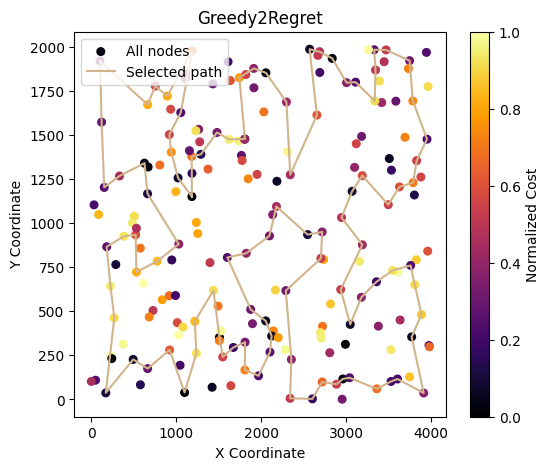

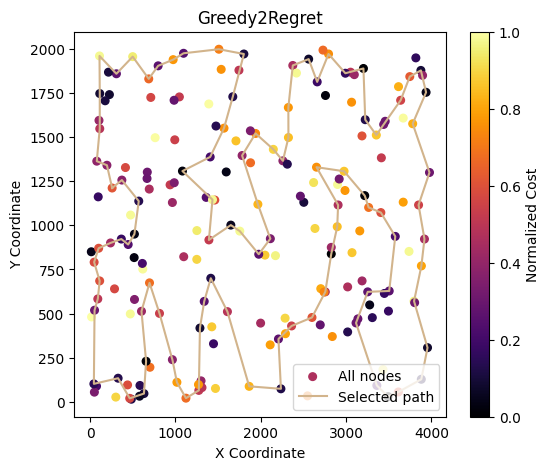

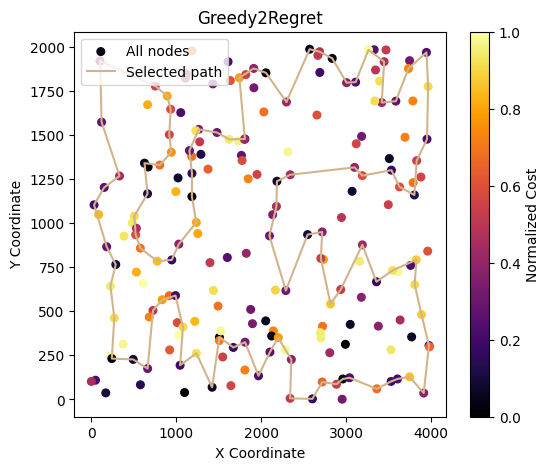

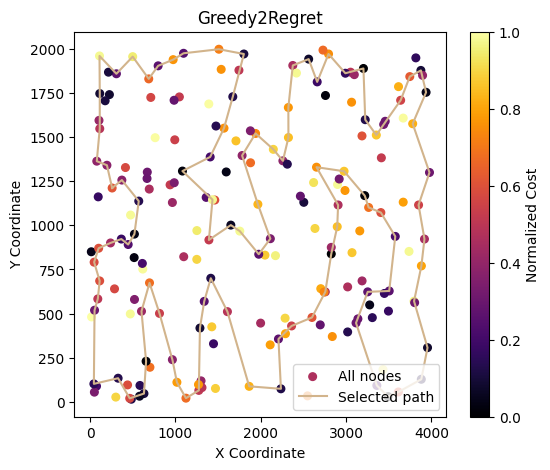

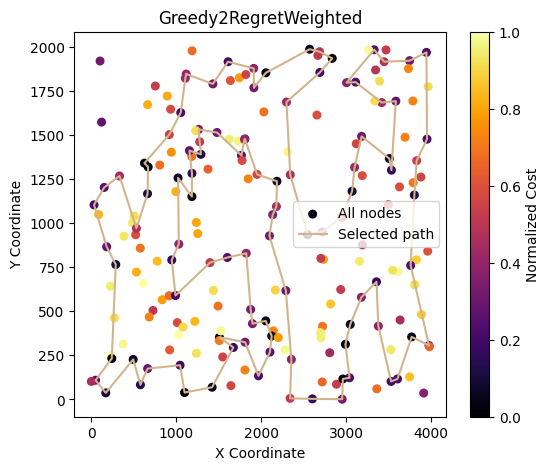

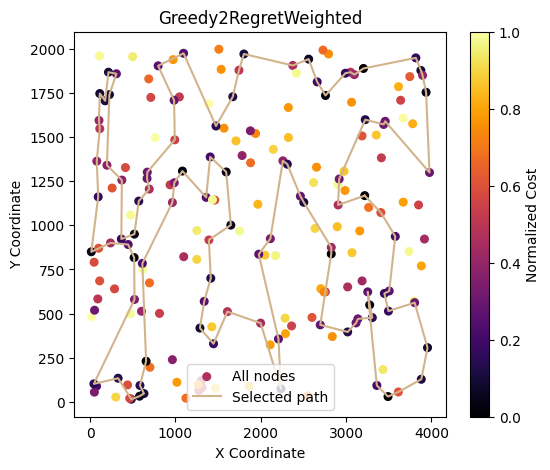

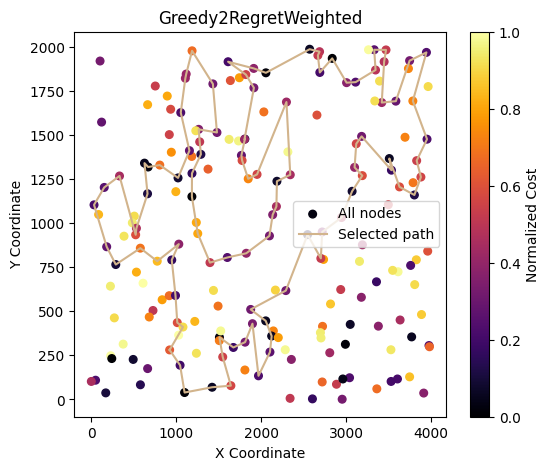

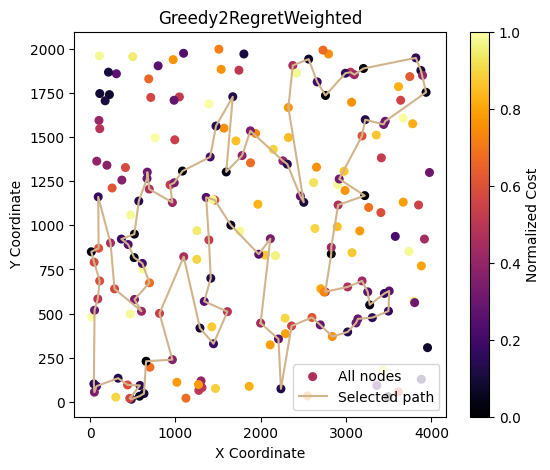

In [4]:
generate_plots_from_results()

In [ ]:
def plot_provided_solution(ax, solution, title, nodes, costs, node_size=30, best_cost=None):
    x_coords = [nodes[node][0] for node in solution]
    y_coords = [nodes[node][1] for node in solution]

    x_nodes = [nodes[node][0] for node in nodes]
    y_nodes = [nodes[node][1] for node in nodes]

    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])
    normalized_costs = [(cost - min(costs)) / (max(costs) - min(costs)) for cost in costs]
    cmap = plt.get_cmap('inferno')

    ax.scatter(x_nodes, y_nodes, s=node_size, c=normalized_costs, cmap=cmap, marker='o', label='All nodes')
    ax.plot(x_coords, y_coords, linestyle='-', markersize=5, color='tan', label='Selected path')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(title)
    ax.legend()
    
    if best_cost is not None:
        ax.text(0.02, 0.92, f'Best Cost: {best_cost}', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

    return ax

In [ ]:
with open("lab3/output.txt") as f:
    file = f.readlines()
    results = {}
    current_algorithm = None
    instance = None
    for line in file:
        if "random" in line:
            skip_next_6 = True
            counter = 0
            continue
        if skip_next_6:
            counter += 1
            if counter == 6:
                skip_next_6 = False
            continue
        if "Name" in line:
            print(line)
            current_algorithm = line.split(":")[1].strip()
            if current_algorithm not in results.keys():
                results[current_algorithm] = {}
            continue
        if "Problem" in line:
            instance = line.split(":")[1].strip()
            if instance not in results[current_algorithm].keys():
                results[current_algorithm][instance] = {}
        if "Best cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Best cost"] = int(cost)
            continue
        if "Worst cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Worst cost"] = int(cost)
            continue
        if "Average cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Average cost"] = int(cost)
            continue
        if "Average time" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Average time"] = float(cost)
            continue
        if "Best solution" in line:
            solution = line.split(":")[1].strip()
            results[current_algorithm][instance]["Best solution"] = [int(x) for x in solution.split(" ")]
            continue

In [248]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_provided_solution(ax, solution, title, nodes, costs, node_size=30, best_cost=None):
    x_coords = [nodes[node][0] for node in solution]
    y_coords = [nodes[node][1] for node in solution]

    x_nodes = [nodes[node][0] for node in nodes]
    y_nodes = [nodes[node][1] for node in nodes]

    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])
    normalized_costs = [(cost - min(costs)) / (max(costs) - min(costs)) for cost in costs]
    cmap = plt.get_cmap('inferno')

    ax.scatter(x_nodes, y_nodes, s=node_size, c=normalized_costs, cmap=cmap, marker='o', label='All nodes')
    ax.plot(x_coords, y_coords, linestyle='-', markersize=5, color='tan', label='Selected path')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(title, fontsize=10)
    
    if best_cost is not None:
        text = ax.text(0.98, 0.02, f'Cost: {best_cost}', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), ha = "right")
    return ax

def generate_results_from_output(output="results.txt", plot_path="./plots/"):
    with open(output) as f:
        file = f.readlines()
    results = {}
    current_algorithm = None
    instance = None
    for line in file:
        print(line)
        if "Name" in line:
            print(line)
            current_algorithm = line.split(":")[1].strip()
            if current_algorithm not in results.keys():
                results[current_algorithm] = {}
            continue
        if "Problem" in line:
            instance = line.split(":")[1].strip()
            if instance not in results[current_algorithm].keys():
                results[current_algorithm][instance] = {}
        if "Best cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Best cost"] = int(cost)
            continue
        if "Worst cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Worst cost"] = int(cost)
            continue
        if "Average cost" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Average cost"] = int(cost)
            continue
        if "Average time" in line:
            cost = line.split(":")[1].strip()
            results[current_algorithm][instance]["Average time"] = float(cost)
            continue
        if "Best solution" in line:
            solution = line.split(":")[1].strip()
            results[current_algorithm][instance]["Best solution"] = [int(x) for x in solution.split(" ")]
            continue
    return results

def plot_from_results(results, total_plots = None):
    if total_plots is None:
        total_plots = len(results) * len(next(iter(results.values())))
    n_rows = (total_plots + 3) // 4  # calculate number of rows required for nx4 grid
    print(n_rows)
    fig, axs = plt.subplots(n_rows, 4, figsize=(int(n_rows*5.5), n_rows*5))
    
    # Handling the case where there's only one row
    
    idx = 0
    for i, algorithm in enumerate(results.keys()):
        for j, instance in enumerate(results[algorithm].keys()):
            print(algorithm, instance)
            df = pd.read_csv(f"./data/{instance}.csv", delimiter=';', names=['x', 'y', 'cost'])
            nodes = {i: (df.x[i], df.y[i]) for i in range(len(df))}
            costs = list(df.cost)
            solution = results[algorithm][instance]["Best solution"]
            
            ax = plot_provided_solution(axs[idx // 4][idx % 4], solution, f"{instance}_{algorithm}", nodes, costs, best_cost=results[algorithm][instance]["Best cost"])
            idx += 1
    
    for i in range(idx, n_rows * 4):  # Turn off unused subplots
        axs[i // 4][i % 4].axis('off')
    
    plt.tight_layout()
    
    # Display a single colorbar for the entire figure without overlap
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cmap = plt.get_cmap('inferno')
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    cbar = fig.colorbar(mappable, cax=cbar_ax)
    cbar.set_label('Normalized Cost')

    handles, labels = axs[0][0].get_legend_handles_labels()
    legend = fig.legend(handles, labels, loc='upper right', prop={'size': 12})
    
    
    plt.show()

# plot_from_results(results)

In [249]:
results = generate_results_from_output("lab3/output.txt")
results

Name: LocalSearch_greedy_random_twoNode

Name: LocalSearch_greedy_random_twoNode

Problem: TSPA

Best cost: 83184

Worst cost: 100901

Average cost: 89613

Average time: 0.126418

Best solution: 19 178 143 159 113 74 163 71 20 183 62 171 186 88 153 175 114 91 161 76 145 128 37 59 96 147 27 185 64 181 25 164 50 121 51 196 169 95 112 72 94 73 31 80 124 8 26 92 48 106 160 11 152 189 75 1 177 41 199 192 77 4 167 101 99 135 134 109 130 119 5 190 98 66 6 141 144 87 117 18 22 195 53 15 108 32 180 81 154 79 194 21 55 36 132 0 69 149 43 35 

Name: LocalSearch_greedy_random_twoEdges

Name: LocalSearch_greedy_random_twoEdges

Problem: TSPA

Best cost: 74008

Worst cost: 78823

Average cost: 76420

Average time: 0.0920067

Best solution: 0 76 161 153 88 127 45 186 170 21 194 79 87 102 144 141 6 156 66 98 190 72 94 73 112 51 135 169 95 31 111 14 80 8 26 48 106 160 11 152 130 119 109 189 75 1 41 177 174 60 101 167 175 192 199 43 77 4 114 91 121 50 149 19 178 159 143 59 147 116 27 96 185 64 20 71 61 

{'LocalSearch_greedy_random_twoNode': {'TSPA': {'Best cost': 83184,
   'Worst cost': 100901,
   'Average cost': 89613,
   'Average time': 0.126418,
   'Best solution': [19,
    178,
    143,
    159,
    113,
    74,
    163,
    71,
    20,
    183,
    62,
    171,
    186,
    88,
    153,
    175,
    114,
    91,
    161,
    76,
    145,
    128,
    37,
    59,
    96,
    147,
    27,
    185,
    64,
    181,
    25,
    164,
    50,
    121,
    51,
    196,
    169,
    95,
    112,
    72,
    94,
    73,
    31,
    80,
    124,
    8,
    26,
    92,
    48,
    106,
    160,
    11,
    152,
    189,
    75,
    1,
    177,
    41,
    199,
    192,
    77,
    4,
    167,
    101,
    99,
    135,
    134,
    109,
    130,
    119,
    5,
    190,
    98,
    66,
    6,
    141,
    144,
    87,
    117,
    18,
    22,
    195,
    53,
    15,
    108,
    32,
    180,
    81,
    154,
    79,
    194,
    21,
    55,
    36,
    132,
    0,
    69,
    149,
    43,
 

In [250]:
results_random_start = results.copy()
results_initial = results.copy()
for algorithm in list(results.keys()):
    if "random" in algorithm:
        del results_initial[algorithm]
    else:
        del results_random_start[algorithm]
        if "Weighted" in algorithm:
            del results_initial[algorithm]["TSPC"]
        if "Cycle" in algorithm:
            del results_initial[algorithm]["TSPA"]
            del results_initial[algorithm]["TSPB"]
            del results_initial[algorithm]["TSPD"]

4
LocalSearch_greedy_GreedyCycle_twoNode TSPC
LocalSearch_greedy_GreedyCycle_twoEdges TSPC
LocalSearch_greedy_Greedy2RegretWeighted_twoNode TSPA
LocalSearch_greedy_Greedy2RegretWeighted_twoNode TSPB
LocalSearch_greedy_Greedy2RegretWeighted_twoNode TSPD
LocalSearch_greedy_Greedy2RegretWeighted_twoEdges TSPA
LocalSearch_greedy_Greedy2RegretWeighted_twoEdges TSPB
LocalSearch_greedy_Greedy2RegretWeighted_twoEdges TSPD
LocalSearch_steepest_GreedyCycle_twoNode TSPC
LocalSearch_steepest_GreedyCycle_twoEdges TSPC
LocalSearch_steepest_Greedy2RegretWeighted_twoNode TSPA
LocalSearch_steepest_Greedy2RegretWeighted_twoNode TSPB
LocalSearch_steepest_Greedy2RegretWeighted_twoNode TSPD
LocalSearch_steepest_Greedy2RegretWeighted_twoEdges TSPA
LocalSearch_steepest_Greedy2RegretWeighted_twoEdges TSPB
LocalSearch_steepest_Greedy2RegretWeighted_twoEdges TSPD


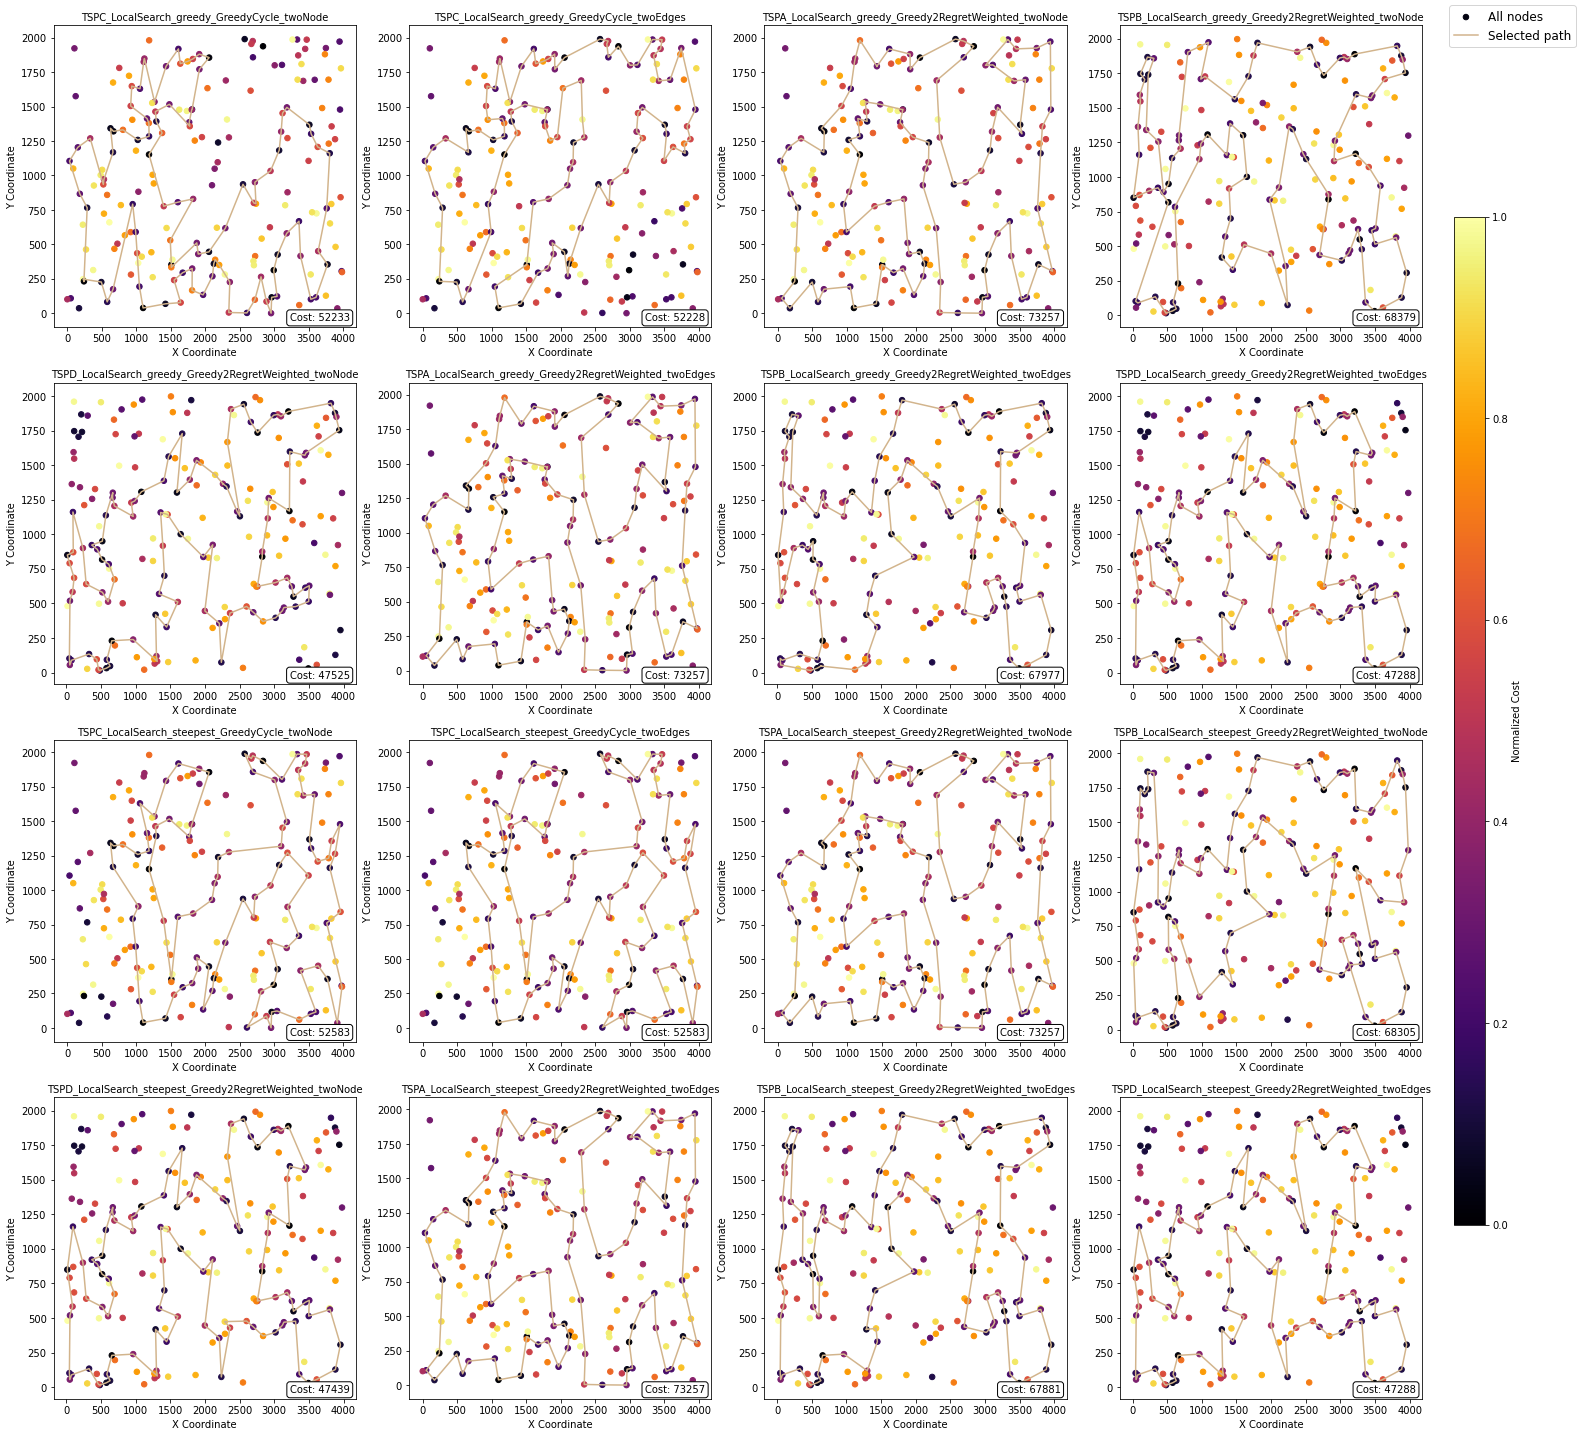

In [251]:
plot_from_results(results_initial, 16)

4
LocalSearch_greedy_random_twoNode TSPA
LocalSearch_greedy_random_twoNode TSPB
LocalSearch_greedy_random_twoNode TSPC
LocalSearch_greedy_random_twoNode TSPD
LocalSearch_greedy_random_twoEdges TSPA
LocalSearch_greedy_random_twoEdges TSPB
LocalSearch_greedy_random_twoEdges TSPC
LocalSearch_greedy_random_twoEdges TSPD
LocalSearch_steepest_random_twoNode TSPA
LocalSearch_steepest_random_twoNode TSPB
LocalSearch_steepest_random_twoNode TSPC
LocalSearch_steepest_random_twoNode TSPD
LocalSearch_steepest_random_twoEdges TSPA
LocalSearch_steepest_random_twoEdges TSPB
LocalSearch_steepest_random_twoEdges TSPC
LocalSearch_steepest_random_twoEdges TSPD


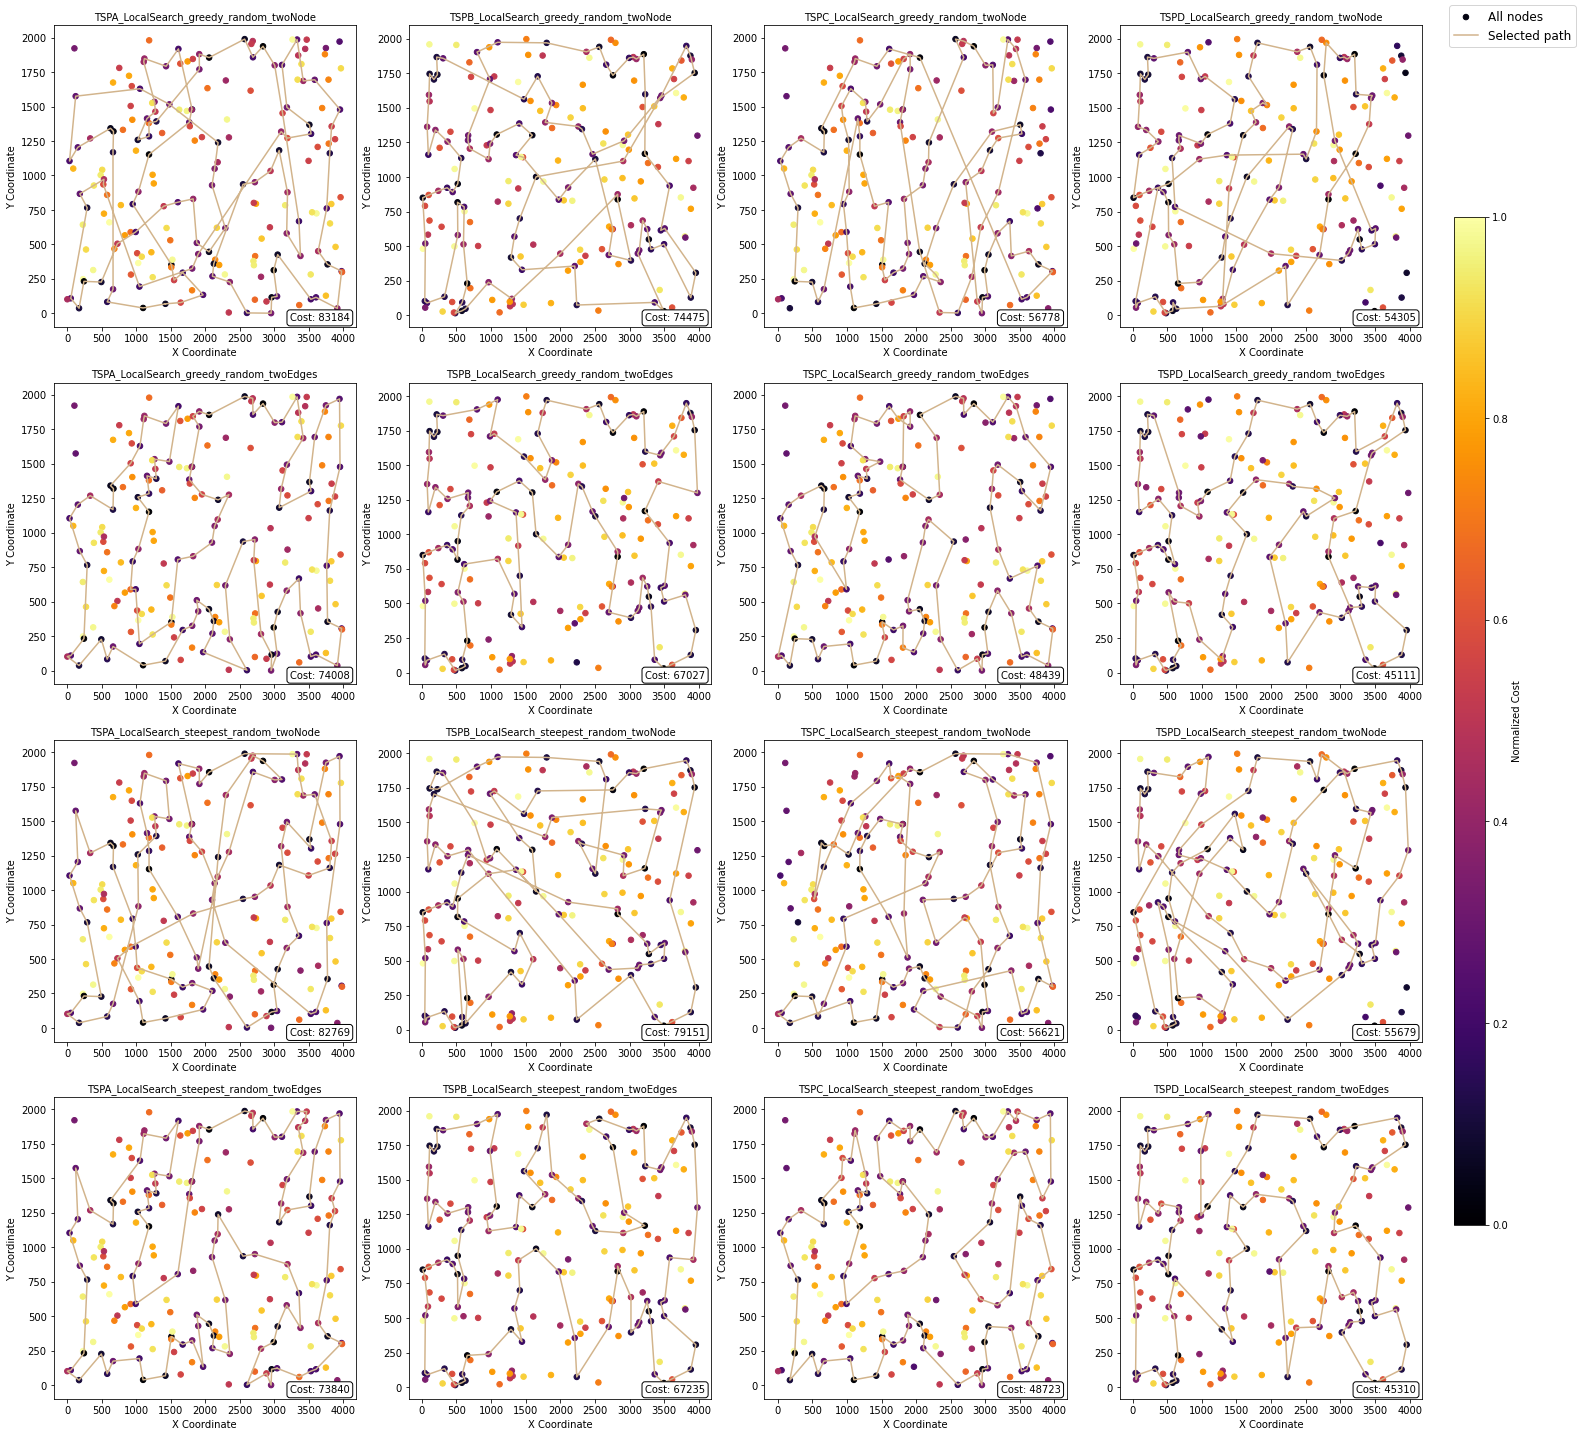

In [252]:
plot_from_results(results_random_start)

In [253]:
starts = {"TSPA":"Greedy2RegretWeighted", "TSPB":"Greedy2RegretWeighted", "TSPC":"GreedyCycle", "TSPD":"Greedy2RegretWeighted"}
def get_method_from_name(name):
    name = name.split("_")
    if name[2] == "random":
        return f"{name[0]}, {name[1]}, {name[3]}, random start"
    else:
        return f"{name[0]}, {name[1]}, {name[3]}, optimal start"

In [276]:
dataframe = {}
for algorithm in results_random_start.keys():
    if get_method_from_name(algorithm) not in dataframe.keys():
        dataframe[get_method_from_name(algorithm)] = {}
    for instance in results_random_start[algorithm].keys():
        best_cost = results_random_start[algorithm][instance]["Best cost"]
        worst_cost = results_random_start[algorithm][instance]["Worst cost"]
        average_cost = results_random_start[algorithm][instance]["Average cost"]
        dataframe[get_method_from_name(algorithm)][instance] = (f"{average_cost} ({best_cost} - {worst_cost})")
        dataframe[get_method_from_name(algorithm)][f"time_{instance}"] = results_random_start[algorithm][instance]["Average time"]
        
for algorithm in results_initial.keys():
    if get_method_from_name(algorithm) not in dataframe.keys():
        dataframe[get_method_from_name(algorithm)] = {}
    for instance in results_initial[algorithm].keys():
        best_cost = results_initial[algorithm][instance]["Best cost"]
        worst_cost = results_initial[algorithm][instance]["Worst cost"]
        average_cost = results_initial[algorithm][instance]["Average cost"]
        dataframe[get_method_from_name(algorithm)][instance] = (f"{average_cost} ({best_cost} - {worst_cost})")
        dataframe[get_method_from_name(algorithm)][f"time_{instance}"] = results_initial[algorithm][instance]["Average time"]

In [277]:
dataframe_ready = {}
collumns = ["TSPA", "TSPB", "TSPC", "TSPD"]
for method in dataframe.keys():
    dataframe_ready[method] = []
    for instance in ["TSPA", "TSPB", "TSPC", "TSPD"]:
        dataframe_ready[method].append(dataframe[method][instance])
df = pd.DataFrame.from_dict(dataframe_ready, orient='index', columns=collumns)

In [278]:
df

,TSPA,TSPB,TSPC,TSPD
"LocalSearch, greedy, twoNode, random start",89613 (83184 - 100901),84351 (74475 - 92299),63043 (56778 - 70089),61370 (54305 - 72363)
"LocalSearch, greedy, twoEdges, random start",76420 (74008 - 78823),69407 (67027 - 72860),50938 (48439 - 54128),47877 (45111 - 51589)
"LocalSearch, steepest, twoNode, random start",91803 (82769 - 101764),87464 (79151 - 100605),65385 (56621 - 72912),64196 (55679 - 75010)
"LocalSearch, steepest, twoEdges, random start",77136 (73840 - 81276),70626 (67235 - 75605),51000 (48723 - 53686),48148 (45310 - 51648)
"LocalSearch, greedy, twoNode, optimal start",74845 (73257 - 76728),70156 (68379 - 75870),54672 (52233 - 57249),52335 (47525 - 58170)
"LocalSearch, greedy, twoEdges, optimal start",74758 (73257 - 76621),69926 (67977 - 76103),54544 (52228 - 57249),52214 (47288 - 58118)
"LocalSearch, steepest, twoNode, optimal start",74840 (73257 - 76745),70162 (68305 - 75870),54681 (52583 - 57249),52331 (47439 - 58170)
"LocalSearch, steepest, twoEdges, optimal start",74729 (73257 - 76621),69872 (67881 - 75907),54502 (52583 - 57304),52158 (47288 - 57947)


In [279]:
times_df = {}
collumns = ["TSPA", "TSPB", "TSPC", "TSPD"]
for method in dataframe.keys():
    times_df[method] = []
    for instance in ["TSPA", "TSPB", "TSPC", "TSPD"]:
        times_df[method].append(dataframe[method][f"time_{instance}"])
times_df = pd.DataFrame.from_dict(times_df, orient='index', columns=collumns)

In [280]:
times_df

,TSPA,TSPB,TSPC,TSPD
"LocalSearch, greedy, twoNode, random start",0.126418,0.084633,0.071423,0.067907
"LocalSearch, greedy, twoEdges, random start",0.092007,0.085688,0.072187,0.070530
"LocalSearch, steepest, twoNode, random start",0.238878,0.245516,0.233042,0.244085
"LocalSearch, steepest, twoEdges, random start",0.239769,0.240823,0.225815,0.235921
"LocalSearch, greedy, twoNode, optimal start",0.008674,0.011366,0.008821,0.010838
"LocalSearch, greedy, twoEdges, optimal start",0.010206,0.013597,0.010626,0.012414
"LocalSearch, steepest, twoNode, optimal start",0.013520,0.018679,0.015335,0.019826
"LocalSearch, steepest, twoEdges, optimal start",0.019682,0.024896,0.020290,0.023809


In [257]:
times_df.to_latex("lab3/latex_times.txt")

In [259]:
with open("lab3/stare.txt") as f:
    file = f.readlines()
results = {}
current_algorithm = None
instance = None
for line in file:
    if "Name" in line:
        current_algorithm = line.split(":")[1].strip()
        if current_algorithm not in results.keys():
            results[current_algorithm] = {}
        continue
    if "Problem" in line:
        instance = line.split(":")[1].strip()
        if instance not in results[current_algorithm].keys():
            results[current_algorithm][instance] = {}
    if "Best cost" in line:
        cost = line.split(":")[1].strip()
        results[current_algorithm][instance]["Best cost"] = int(cost)
        continue
    if "Worst cost" in line:
        cost = line.split(":")[1].strip()
        results[current_algorithm][instance]["Worst cost"] = int(cost)
        continue
    if "Average cost" in line:
        cost = line.split(":")[1].strip()
        results[current_algorithm][instance]["Average cost"] = int(cost)
        continue
    if "Average time" in line:
        cost = line.split(":")[1].strip()
        results[current_algorithm][instance]["Average time"] = float(cost)
        continue
    if "Best solution" in line:
        solution = line.split(":")[1].strip()
        results[current_algorithm][instance]["Best solution"] = [int(x) for x in solution.split(" ")]
        continue
for algorithm in results.keys():
    for instance in results[algorithm].keys():
        best_cost = results[algorithm][instance]["Best cost"]
        worst_cost = results[algorithm][instance]["Worst cost"]
        average_cost = results[algorithm][instance]["Average cost"]
        print(f"{algorithm}, {instance}, {average_cost} ({best_cost} - {worst_cost})")


random, TSPA, 265960 (241401 - 291974)
random, TSPB, 266173 (238932 - 298719)
random, TSPC, 214717 (195508 - 234649)
random, TSPD, 219237 (200173 - 242636)
GreedyCycle, TSPA, 76050 (74480 - 78819)
GreedyCycle, TSPB, 69765 (67650 - 74834)
GreedyCycle, TSPC, 55329 (52729 - 57931)
GreedyCycle, TSPD, 54418 (49815 - 60032)
Greedy2RegretWeighted, TSPA, 75353 (73520 - 77180)
Greedy2RegretWeighted, TSPB, 70844 (68965 - 76615)
Greedy2RegretWeighted, TSPC, 55426 (53109 - 58049)
Greedy2RegretWeighted, TSPD, 53222 (48665 - 58626)
NearestNeighbours, TSPA, 86620 (83436 - 93339)
NearestNeighbours, TSPB, 78509 (76352 - 81887)
NearestNeighbours, TSPC, 58403 (55587 - 63601)
NearestNeighbours, TSPD, 53785 (50012 - 59234)
Greedy2Regret, TSPA, 115177 (107525 - 123273)
Greedy2Regret, TSPB, 117706 (107284 - 126693)
Greedy2Regret, TSPC, 68580 (64627 - 72710)
Greedy2Regret, TSPD, 69907 (64307 - 74108)
